最小二乗法（MES）

In [10]:
import numpy as np
import matplotlib.pyplot as plt

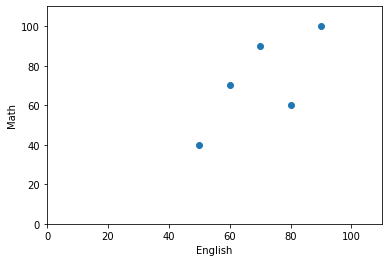

In [15]:
X = np.array([50,60,70,80,90])
y = np.array([40,70,90,60,100])
plt.plot(X,y,"o")
plt.xlabel('English')
plt.ylabel('Math')
plt.xlim(0,110)
plt.ylim(0,110)
plt.show()

In [46]:
mean_squared_error(X,y)

220.0

ボストンの住宅価格を用いて単回帰分析を行う。

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(dir(boston))
print(boston.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'target']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

CRIM	人口１人当たりの犯罪発生数
ZN	25000平方フィート以上の住居区間の占める割合
INDUS	小売業以外の商業が占める面積の割合
CHAS	チャーチルズ川によるダミー変数（１：川の周囲、２：それ以外）
NOX	NOxの濃度
RM	住居の平均部屋数
AGE	1940年より前に建てられた物件の割合
DIS	5つのボストン市の雇用施設からの距離（重み付け済）
RAD	環状高速道路へのアクセスのしやすさ
TAX	$10,000当たりの不動産税率の総計
PTRATIO	町毎の児童と教師の比率
B	町毎の黒人(Bk)の比率1000(Bk-0.63)^2
LSTAT	給与の低い職業に従事する人口の割合

In [6]:
X = boston.data
y = boston.target
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_X.columns = boston.feature_names
df_y.columns = ["target"]
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [4]:
boston = datasets.load_boston()

# 特徴量
X = boston.data[:, [5]] #部屋数
print(X)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [48]:
# データセットロード
boston = datasets.load_boston()

# 特徴量
X = boston.data[:, [5]] # 部屋数

# 目的変数
Y = boston.target

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# 予測　
Y_pred = lr.predict(X_test)

#
# 評価
#
# 平均二乗誤差(MSE)
mse = mean_squared_error(Y_test,Y_pred)
# 平均絶対誤差(MAE)
mae = mean_absolute_error(Y_test, Y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("MSE =",mse)
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

MAE = 4.21,  RMSE = 6.59,  score = 0.47
MSE = 43.472041677202206
Coef =  [9.31294923]
Intercept = -36.180992646339206


平均絶対誤差（MAE：Mean Absolute Error）
各データに対して「正解値と予測値の差（＝誤差）」*1の絶対値を計算し、その総和をデータ数で割った値（＝平均値）を表す。

RMSEとは予測と値がどの程度離れているのかを評価する関数です

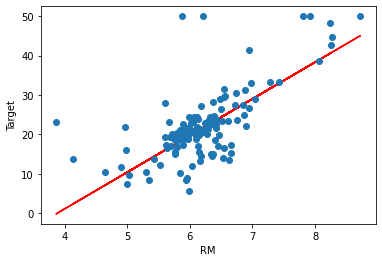

In [6]:
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, Y_pred, "r-")
plt.plot(X_test, Y_test, "o")